# Best channel search

Realizando 20 rodadas de classificação com `SVC` no dataset `chb01dwt` para determinar com qual canal se obtém os melhores resultados.

## Importando biblioteca

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb_dwt_df = pd.read_csv('./chb01dwt.csv')

target_dwt_s = chb_dwt_df.pop('target')

random_seeds = np.random.randint(0, 9000, 20)

random_seeds

array([2113, 3887, 7255, 5195,  115,  169, 6656, 2870, 5938, 1296, 5421,
       3134, 6846, 2093, 5858,  168, 2330, 2763,   96,  681])

## Realizando classificação por canal

In [3]:
channels_df = pd.DataFrame(columns=range(18))

for channel in range(18):

    channel_acc = []

    # X recebe apenas as colunas relacionadas ao canal da iteração
    X = chb_dwt_df[
        [column for column in chb_dwt_df.columns if (f'{channel}' in column.split('-'))]
    ].values
    y = target_dwt_s.values

    for seed in random_seeds:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    channels_df[channel] = channel_acc

channels_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.992308,0.923077,0.961538,0.969231,0.976923,0.953846,0.953846,0.984615,0.976923,0.969231,0.992308,0.969231,0.992308,0.969231,0.969231,0.961538,0.961538,0.953846
1,0.984615,0.953846,0.923077,0.969231,0.984615,0.969231,0.969231,0.976923,0.992308,0.946154,0.984615,0.976923,1.000000,0.938462,0.984615,0.969231,0.992308,0.969231
2,0.992308,0.969231,0.961538,0.992308,0.984615,0.984615,0.984615,0.984615,0.984615,0.984615,0.984615,0.976923,0.992308,0.992308,0.969231,0.984615,1.000000,0.969231
3,0.984615,0.976923,0.976923,0.976923,0.992308,0.984615,1.000000,0.984615,0.992308,0.984615,0.984615,0.976923,0.984615,0.984615,0.969231,0.961538,0.992308,0.961538
4,0.984615,0.969231,0.961538,0.984615,0.976923,0.992308,0.976923,0.992308,0.992308,0.969231,0.976923,0.976923,0.976923,0.976923,0.946154,0.969231,0.992308,0.976923
5,0.976923,0.930769,0.946154,0.984615,0.984615,0.961538,0.953846,0.976923,0.984615,0.969231,0.961538,0.984615,0.976923,0.938462,0.961538,0.976923,0.992308,0.946154
6,0.992308,0.976923,0.961538,0.976923,1.000000,1.000000,0.992308,0.969231,0.976923,0.984615,0.992308,0.984615,0.976923,0.961538,0.961538,0.969231,0.984615,0.969231
7,0.992308,0.946154,0.976923,0.976923,0.984615,0.976923,0.969231,0.976923,1.000000,0.992308,0.969231,1.000000,1.000000,0.992308,0.976923,0.992308,1.000000,0.938462
8,0.969231,0.953846,0.961538,1.000000,0.976923,0.976923,0.984615,1.000000,0.976923,1.000000,1.000000,0.969231,0.984615,0.984615,0.953846,0.976923,0.984615,0.976923
9,0.984615,0.953846,0.946154,0.984615,0.976923,0.953846,0.961538,0.984615,0.984615,0.984615,0.984615,0.976923,0.984615,0.969231,0.961538,0.976923,0.984615,0.953846


,count,mean,std,min,25%,50%,75%,max
16,20.0,0.987692,0.009471,0.961538,0.984615,0.992308,0.992308,1.000000
4,20.0,0.983846,0.010260,0.953846,0.976923,0.984615,0.992308,1.000000
0,20.0,0.983077,0.009204,0.969231,0.976923,0.984615,0.992308,1.000000
7,20.0,0.982692,0.010552,0.953846,0.976923,0.984615,0.992308,1.000000
8,20.0,0.982692,0.010843,0.953846,0.976923,0.984615,0.992308,1.000000
10,20.0,0.982308,0.008681,0.961538,0.976923,0.984615,0.984615,1.000000
12,20.0,0.981923,0.011238,0.953846,0.976923,0.984615,0.986538,1.000000
3,20.0,0.977692,0.009634,0.961538,0.969231,0.976923,0.984615,1.000000
11,20.0,0.977692,0.010559,0.953846,0.975000,0.976923,0.984615,1.000000
9,20.0,0.975385,0.017927,0.938462,0.969231,0.984615,0.984615,1.000000


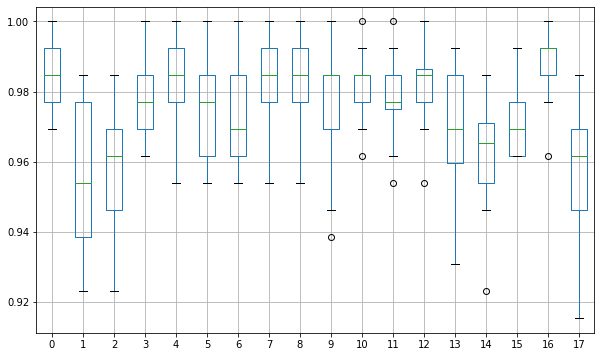

In [4]:
channels_df.boxplot(figsize=(10, 6))
channels_df.describe().transpose().sort_values(by='mean', ascending=False)